# Natural Language Processing (NLP)







# Sentimental Analysis Model  Using DNN (TensorFlow )

This model is Trained to  Understand Reviews given by the Customers of a Restaurant and Classify
them as Positive or Negative .

Working of the MODEL---

Being a Supervised Learning Problem We provide it with a labled Dataset from Restaurant_Reviews.tsv. 

We First Do the Preprocessing of the Text data and Convert it into 
Meachine Understandable Language .

To make our Model Robust we will be looking at using a word level Recurrent Neural Network (RNN) and Embedding the vocab.

We will also Try to play with the HYPERPARAMETERS with the help of Graphs.



# TEXT PREPROCESSING

Importing the libraries 

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding,LSTM
import numpy as np

In [2]:
data=pd.read_csv('D:/User/Desktop/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

Storing the Revives in the xx Variable

In [3]:
xx=data.iloc[:,0]

The Keras Tokenizer Method does the Hard Work for us By Removing all the unwanted characters' from the Text and Then
Converting it into sequence of Tokens.

In [4]:
token=tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')


In [5]:
token.fit_on_texts(xx)
xx=token.texts_to_sequences(xx)

Lets us see the First Sentence in the After getting Tokanized.

In [6]:
xx[0]

[428, 165, 8, 15]

Now let's Calculate The length of the Largest Sentence

In [7]:
le=0
for e in xx:
  if le<len(e):
    le=len(e)
max_len=le
max_len

32

Now let's see the Largest value of Vocab word To decide the Length of the Vocab to Make our Model Efficient and Fast . 

In [8]:

t=0
for ele in xx:
  if max(ele)>t:
    t=max(ele)
vocab=t
vocab

2071

Let's Make the Lengths  Same

In [9]:
xx=tf.keras.preprocessing.sequence.pad_sequences(xx,maxlen=le,padding='post')

# MODEL PREPRATION

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xx,data.iloc[:,1],test_size=0.20,random_state=0)

As saind we are using Word Embiding Concept and LSTM to make our Model Robust and Perform to a large examples

In [11]:
model=Sequential() 
model.add(Embedding(input_dim=vocab+1,output_dim=10,input_length=max_len))
model.add(LSTM(10, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [157]:
mf=model.fit(x_train, y_train,
          batch_size=15,
          epochs=15,
          validation_data=(x_test, y_test))

Epoch 1/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6930 - val_accuracy: 0.5300
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.6933 - accuracy: 0.4925 - val_loss: 0.6931 - val_accuracy: 0.4850
Epoch 3/20
40/40 [==============================] - 1s 16ms/step - loss: 0.6928 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.4850
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6928 - accuracy: 0.5013 - val_loss: 0.6929 - val_accuracy: 0.4850
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6918 - accuracy: 0.5150 - val_loss: 0.6923 - val_accuracy: 0.4850
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6890 - accuracy: 0.5350 - val_loss: 0.6874 - val_accuracy: 0.6050
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6569 - accuracy: 0.6438 - val_loss: 0.6454 - val_accuracy: 0.6750
Epoch 8/20
40

In [158]:
test_acc = model.evaluate(x_test,y_test)
test_acc

7/7 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.8350


[0.5006871223449707, 0.8349999785423279]

# TEST_ACCURACY :84%

Graphs to understand the over all performance of the Model.

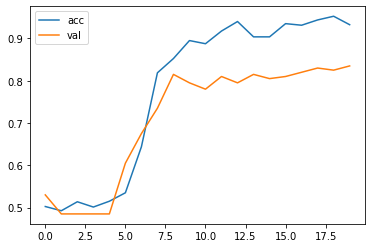

In [160]:
import matplotlib.pyplot as plt
plt.plot(mf.epoch,mf.history['accuracy'],label='acc')
plt.plot(mf.epoch,mf.history['val_accuracy'],label='val')
plt.legend()

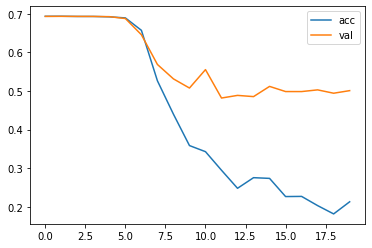

In [161]:
plt.plot(mf.epoch,mf.history['loss'],label='acc')
plt.plot(mf.epoch,mf.history['val_loss'],label='val')
plt.legend()

After playing with he Hyperparameters' the Model we have pretty much optained a Good Accuracy But as we can see Our
Model still exibites some Overfitting ,That means there's  still scope of OPTIMIZATION.

# MAKING OUR OWN PREDICATIONES


The Weights of the model is saved so we don't have to train it again.
Loding the model weights

In [13]:
nmm=model.load_weights('D:/User/Desktop/NLP_Model_Weights.h5')

Add the Sentences to Test the Model

Below are Few Examples, I have Also tried to Trick the Model by Framing the few Sentences other way round.
Whic it Have pretty much Passed.

In [15]:
ll = ['I Liked this .',
'It is not that good as i thought it would be .','Above my expectations .','nice work .'
    ,'Could have been some better .','expected more','Could not be better than this' ,
    'This lookes nice','loved it','i love this','i do not love this']

In [18]:
def output1(l,nmm):
    
    #model=nm
    T=pd.DataFrame(l)
    T=T.iloc[:,0]
    x11=token.texts_to_sequences(T)
    x1=tf.keras.preprocessing.sequence.pad_sequences(x11,maxlen=le,padding='post')
    aa=model.predict(x1)
    aa=aa>0.5
    df=pd.DataFrame({'Reviews':list(l),'Liked':list(aa)})
    print(df)


output1(ll,nmm)

                                           Reviews    Liked
0                                   I Liked this .   [True]
1   It is not that good as i thought it would be .  [False]
2                          Above my expectations .   [True]
3                                      nice work .   [True]
4                    Could have been some better .  [False]
5                                    expected more  [False]
6                    Could not be better than this  [False]
7                                 This lookes nice   [True]
8                                         loved it   [True]
9                                      i love this   [True]
10                              i do not love this  [False]


# Results